# Titanic Survival Prediction
The sinking of the Titanic is one of the most infamous shipwrecks in history.  
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew  .
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than other  sIn this project, we aim at building a Machine Learning model capable of predicting whether a passenger survived the shipwreck or not. We predict a value of 0 (casualty) or 1 (survivor)

#### Dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset.


In [101]:
#We begin with importing all the necessary libraries
#For Data Analysis
import numpy as np
import pandas as pd
#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Logistic Regression (ML)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
#To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [102]:
#Reading the dataset from csv into a python pandas dataframe
data = pd.read_csv(r"D:\AISSMS IOIT - AI&DS (628299510)\General\CodSoft\Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis
We begin with exploring the dataset, analysing the spread, type and variations in the data for us to obtain a better understanding of the data.  
This would further aid us in model building.

In [103]:
data.shape

(891, 12)

In [104]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [105]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
#Checking for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
#Dropping the cabin column since 77% of its data is missing.
data = data.drop(columns = "Cabin", axis = 1)

In [109]:
#Imputing the null values
data["Age"].fillna(data["Age"].mean(), inplace = True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace = True)

In [110]:
#Rechecking for null values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [111]:
#Evaluating the statistics of the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [113]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [114]:
data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# Data Visualization

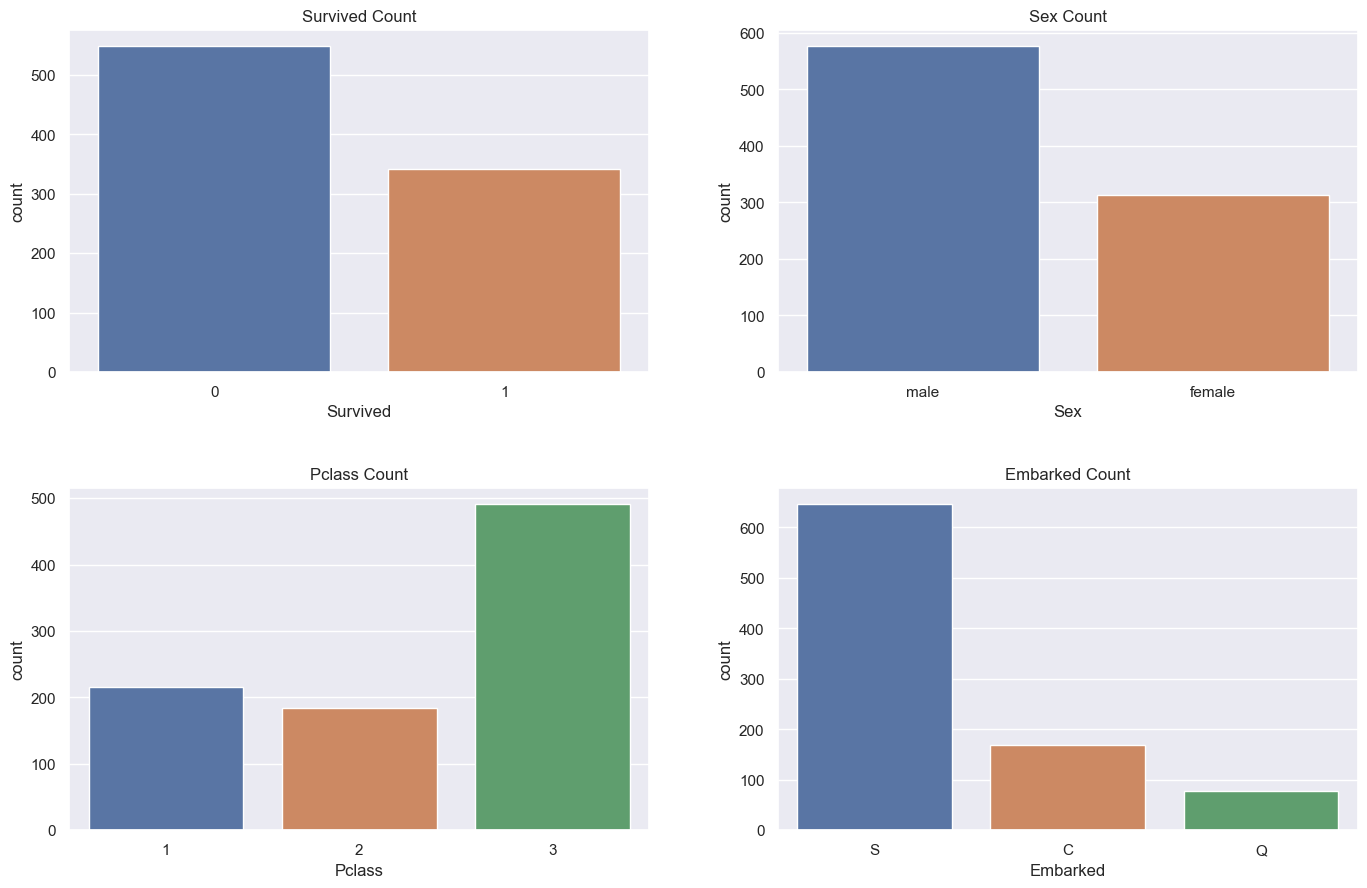

In [115]:
#sns.set() sets the aesthetic style of the plots
sns.set()
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
plt.tight_layout(pad = 5.0)
# Plot 1: Countplot of 'Survived'
sns.countplot(x = "Survived", data = data, ax = axes[0, 0])             
axes[0, 0].set_title("Survived Count")
# Plot 2: Countplot of 'Sex'
sns.countplot(x = "Sex", data = data, ax = axes[0, 1])
axes[0, 1].set_title("Sex Count")
# Plot 3: Countplot of 'Pclass'
sns.countplot(x = "Pclass", data = data, ax = axes[1, 0])
axes[1, 0].set_title("Pclass Count")
# Plot 4: Countplot of 'Pclass'
sns.countplot(x = "Embarked", data = data, ax = axes[1, 1])
axes[1, 1].set_title("Embarked Count")
# Display the plots
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

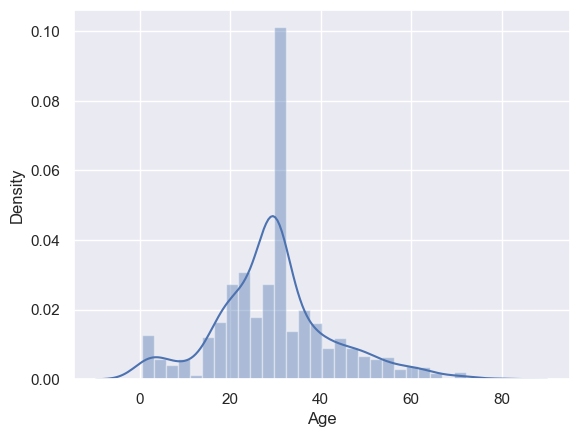

In [116]:
#Distribution plot for Age
sns.distplot(data["Age"])

In [117]:
#Correlation and Covariance matrices
num_data = data.select_dtypes(include = "number")
corr = num_data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [118]:
cov = num_data.cov()
cov

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,111.113042,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.441656,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196
Age,111.113042,-0.441656,-3.601855,169.052400,-3.335345,-1.877987,59.162200
SibSp,-16.325843,-0.018954,0.076599,-3.335345,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-1.877987,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,59.162200,8.748734,8.661052,2469.436846


<Axes: >

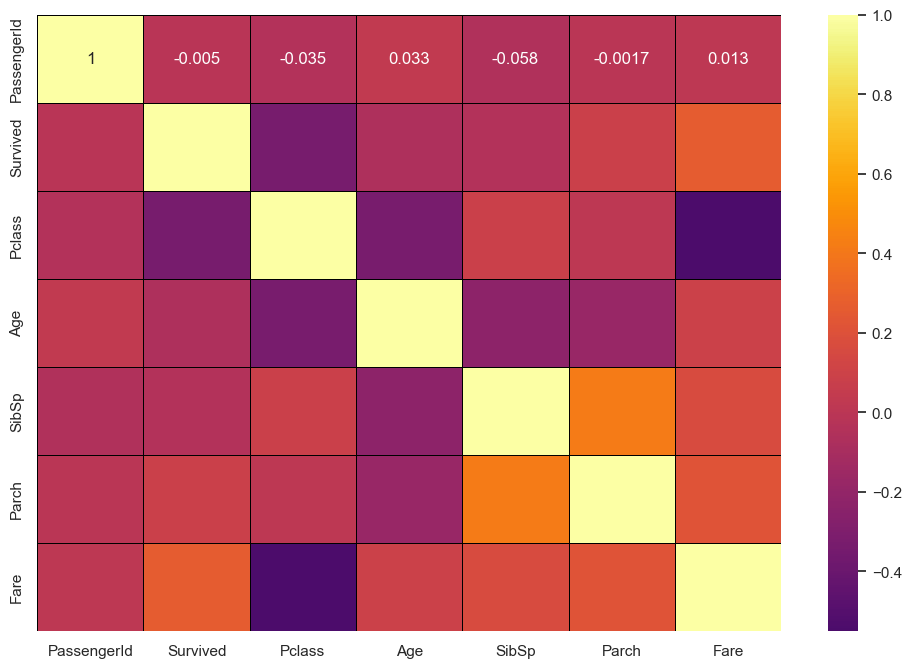

In [119]:
#Plotting heatmaps for visualizing the correlation
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = "inferno", linewidths = 0.5, linecolor = "black", center = 0)


# Data Preparation

In [120]:
data.replace({"Sex": {"male": 0, "female": 1}, "Embarked": {"S": 0, "C": 1, "Q": 2}}, inplace = True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [121]:
X = data.drop(columns = ["PassengerId", "Name", "Ticket"], axis = 1)
Y=data['Survived']

In [122]:
#Splitting the Data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


# Model Building

In [123]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

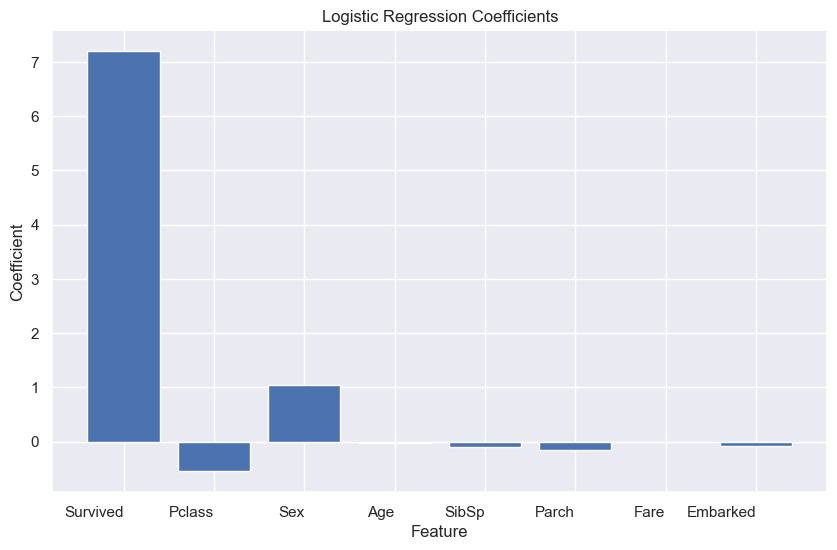

In [124]:
#Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.xticks(ha='right')
plt.show()

# Model Evaluation

In [125]:
X_train_prediction=model.predict(X_train)
train_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy Score of Training data: ", train_data_accuracy)
X_test_prediction=model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy Score of Testing data:", test_data_accuracy)

Accuracy Score of Training data:  1.0
Accuracy Score of Testing data: 1.0


In [126]:
Y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [127]:
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[105   0]
 [  0  74]]


In [128]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

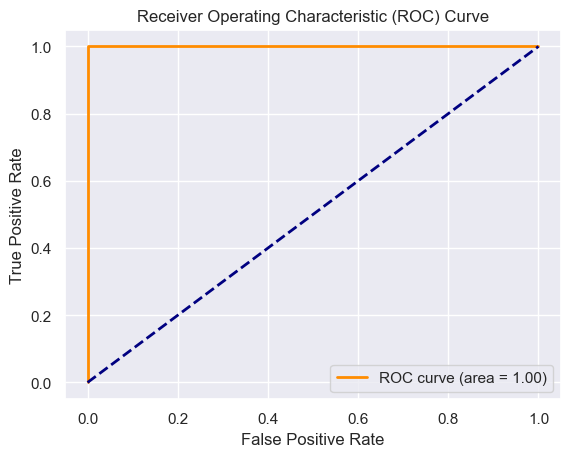

In [129]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Thank you!!!